In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
houses_train = pd.read_csv('houses_train.csv')
houses_test = pd.read_csv('houses_test.csv')

In [3]:
test_ids = houses_test['Id'] #ids for the submission file

First of all i googled which are important factors to determine how much a house worth , that's what i found:

- if the property has free space to build new rooms , so maybe we'll calculate the lot free area.
- number of bathrooms : houses with more bathroooms are more valuable , even more if they have many bedrooms, maybe we can calculate the difference between the number of bathrooms and the number of bedrooms
- if the property has a garage or parking spot
- age and condition , in the dataset we have many features about quality and condition , we also have the date of the last remodel

# EDA on the train data

In [4]:
houses_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
houses_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
houses_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
columns_with_null_values = houses_train.columns[houses_train.isna().any()].tolist()

#getting the name and total number of null values per column
columns_with_null_values_sum = {}
for column_name in columns_with_null_values:
    columns_with_null_values_sum[column_name] = houses_train[column_name].isnull().sum()
    
columns_with_null_values_sum

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

# Handling missing data on train data

## Alley column

In [8]:
#there are so many null values for Alley , we'll drop the entire column
houses_train.drop(['Alley'],axis=1,inplace=True)

## MasVnrType column

In [9]:
houses_train[houses_train['MasVnrType'].isna()]['MasVnrArea']

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

In [10]:
houses_train['MasVnrType'].isna().sum()

8

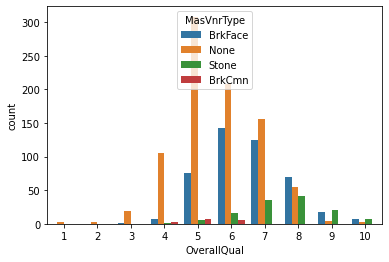

In [11]:
sns.countplot(houses_train['OverallQual'] , hue= houses_train['MasVnrType'])
#BrkFace and stone is used in better quality houses

In [12]:
def input_MasVnrType(cols):
    
    MasVnrType = cols[0]
    OverallQual = cols[1]
    if pd.isnull(MasVnrType):
        if OverallQual < 8:
            return 'None'
        elif OverallQual > 8:
            return 'Stone'
        else:
            return 'BrkFace'
    else:
        return MasVnrType

In [13]:
houses_train['MasVnrType'] = houses_train[['MasVnrType','OverallQual']].apply(input_MasVnrType,axis = 1)

In [14]:
houses_train['MasVnrType'].isna().sum()

0

##  MasVnrArea column

In [15]:
houses_train['MasVnrArea'].isna().sum()

8

In [16]:
houses_train[houses_train['MasVnrArea'].isna()][['MasVnrArea','MasVnrType','OverallQual']]

,MasVnrArea,MasVnrType,OverallQual
234,NaN,None,6
529,NaN,None,6
650,NaN,None,7
936,NaN,None,7
973,NaN,None,7
977,NaN,None,7
1243,NaN,Stone,10
1278,NaN,BrkFace,8


In [17]:
#not every house has a MasVnr , so we'll calculate the mean only of those that has one.
MasVnrArea_mean = houses_train[houses_train['MasVnrType'] != 'None']['MasVnrArea'].mean()

In [18]:
def input_MasVnrArea(cols):
    
    if pd.isnull(cols[1]):
        #if there isn't a masVnr the area is 0
        if cols[0] == 'None' :
            return 0.0
        #if there is a masVnr the area is the mean previously calculated
        else:
            return MasVnrArea_mean
    else:
        return cols[1]

In [19]:
houses_train['MasVnrArea'] = houses_train[['MasVnrType','MasVnrArea']].apply(input_MasVnrArea,axis = 1)

In [20]:
houses_train['MasVnrArea'].isna().sum()

0

## BsmtQual column

In [21]:
houses_train['BsmtQual'].isna().sum()

37

In [22]:
houses_train[houses_train['BsmtQual'].isna()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0
39,NaN,NaN,NaN,NaN,NaN,0
90,NaN,NaN,NaN,NaN,NaN,0
102,NaN,NaN,NaN,NaN,NaN,0
156,NaN,NaN,NaN,NaN,NaN,0
182,NaN,NaN,NaN,NaN,NaN,0
259,NaN,NaN,NaN,NaN,NaN,0
342,NaN,NaN,NaN,NaN,NaN,0
362,NaN,NaN,NaN,NaN,NaN,0
371,NaN,NaN,NaN,NaN,NaN,0


In [23]:
#the houses with null BsmtQual values does not have a basement , as seen on the cell above
houses_train['BsmtQual'].fillna(value = 'NA',inplace = True)

In [24]:
houses_train['BsmtQual'].isna().sum()

0

## BsmtCond column

In [25]:
houses_train['BsmtCond'].isna().sum()

37

In [26]:
houses_train[houses_train['BsmtCond'].isna()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NA,NaN,NaN,NaN,NaN
39,NA,NaN,NaN,NaN,NaN
90,NA,NaN,NaN,NaN,NaN
102,NA,NaN,NaN,NaN,NaN
156,NA,NaN,NaN,NaN,NaN
182,NA,NaN,NaN,NaN,NaN
259,NA,NaN,NaN,NaN,NaN
342,NA,NaN,NaN,NaN,NaN
362,NA,NaN,NaN,NaN,NaN
371,NA,NaN,NaN,NaN,NaN


In [27]:
#the houses with null BsmtQual values does not have a basement , as seen on the cell above
houses_train['BsmtCond'].fillna(value = 'NA',inplace = True)

In [28]:
houses_train['BsmtCond'].isna().sum()

0

## BsmtCond column

In [29]:
houses_train['BsmtExposure'].isna().sum()

38

In [30]:
houses_train[houses_train['BsmtExposure'].isna()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NA,NA,NaN,NaN,NaN
39,NA,NA,NaN,NaN,NaN
90,NA,NA,NaN,NaN,NaN
102,NA,NA,NaN,NaN,NaN
156,NA,NA,NaN,NaN,NaN
182,NA,NA,NaN,NaN,NaN
259,NA,NA,NaN,NaN,NaN
342,NA,NA,NaN,NaN,NaN
362,NA,NA,NaN,NaN,NaN
371,NA,NA,NaN,NaN,NaN


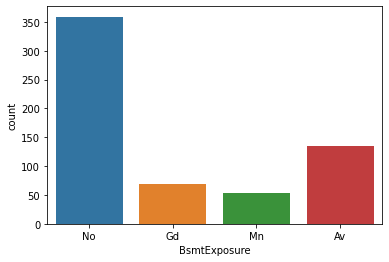

In [31]:
sns.countplot(houses_train[houses_train['BsmtQual'] == 'Gd']['BsmtExposure'])

In [32]:
#based on the chart above , basements with gd quality has no exposure on average , that is the case of the house of index 948
houses_train['BsmtExposure'].iloc[948]  = 'No'

/home/raphael/.local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
#the other houses  does not have a basement 
houses_train['BsmtExposure'].fillna(value = 'NA',inplace = True)

In [34]:
houses_train['BsmtExposure'].isna().sum()

0

## BsmtFinType1 column

In [35]:
houses_train['BsmtFinType1'].isna().sum()

37

In [36]:
houses_train[houses_train['BsmtFinType1'].isna()][['BsmtQual']]

,BsmtQual
17,NA
39,NA
90,NA
102,NA
156,NA
182,NA
259,NA
342,NA
362,NA
371,NA


In [37]:
houses_train['BsmtFinType1'].fillna(value = 'NA',inplace = True)

## BsmtFinType2 column

In [38]:
houses_train['BsmtFinType2'].isna().sum()

38

In [39]:
houses_train[houses_train['BsmtFinType2'].isna()][['BsmtQual','TotalBsmtSF']]

,BsmtQual,TotalBsmtSF
17,NA,0
39,NA,0
90,NA,0
102,NA,0
156,NA,0
182,NA,0
259,NA,0
332,Gd,3206
342,NA,0
362,NA,0


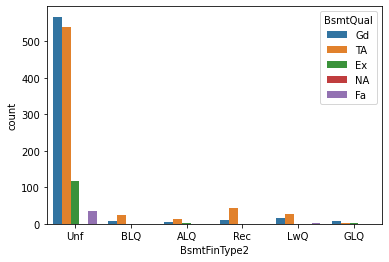

In [40]:
sns.countplot(houses_train['BsmtFinType2'],hue = houses_train['BsmtQual'])
#the vast majority of the second type of finish is unfinished

In [41]:
houses_train['BsmtFinType2'].iloc[332]  = 'Unf'

/home/raphael/.local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [42]:
houses_train['BsmtFinType2'].fillna(value = 'NA',inplace = True)

##  LotFrontage column

In [43]:
houses_train['LotFrontage'].isna().sum()

259

In [44]:
houses_train[houses_train['LotFrontage'].isna()][['LotConfig','LotFrontage']]

,LotConfig,LotFrontage
7,Corner,NaN
12,Inside,NaN
14,Corner,NaN
16,CulDSac,NaN
24,Inside,NaN
...,...,...
1429,Corner,NaN
1431,Inside,NaN
1441,Inside,NaN
1443,Inside,NaN


In [45]:
houses_train['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [46]:
houses_train[houses_train['LotFrontage'].isna()]['LotConfig'].value_counts()

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

In [47]:
lotConfig_means = houses_train.dropna(subset=['LotFrontage']).groupby('LotConfig').LotFrontage.mean()

In [48]:
lotConfig_means

LotConfig
Corner     84.039801
CulDSac    59.911111
FR2        63.515152
FR3        70.750000
Inside     67.715686
Name: LotFrontage, dtype: float64

In [49]:
lotConfig_means['Corner']

84.03980099502488

In [50]:
nullValue_lotFrontage_rows_indexes = houses_train[houses_train['LotFrontage'].isna()].index

In [51]:
lotFrontage_column_index = houses_train.columns.get_loc('LotFrontage')

In [52]:
for i in nullValue_lotFrontage_rows_indexes:
    aux =  float("{:.2f}".format(lotConfig_means[houses_train['LotConfig'].iloc[i]]))
    houses_train.iloc[i,lotFrontage_column_index] = aux
   

In [53]:
houses_train['LotFrontage'].isna().sum()

0

## Electrical column

In [54]:
houses_train['Electrical'].isna().sum()

1

In [55]:
houses_train[houses_train['Electrical'].isna()][['BldgType','OverallQual']]

,BldgType,OverallQual
1379,1Fam,5


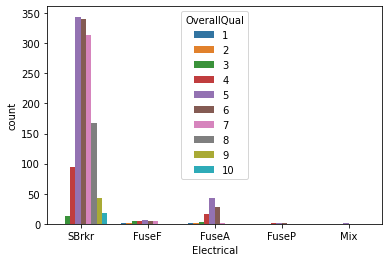

In [56]:
sns.countplot(houses_train['Electrical'],hue = houses_train['OverallQual'])

In [57]:
houses_train['Electrical'].iloc[1379] = 'SBrkr'

/home/raphael/.local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## FireplaceQu column

In [58]:
houses_train['FireplaceQu'].isna().sum()

690

In [59]:
houses_train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [60]:
#number of fireplaces in houses that have null value FireplaceQu column
houses_train[houses_train['FireplaceQu'].isna()]['Fireplaces'].value_counts()

0    690
Name: Fireplaces, dtype: int64

In [61]:
#the values are null because the houses doesnt have fireplaces
houses_train['FireplaceQu'].fillna(value = 'NA',inplace = True)

In [62]:
#just for curiosity purpose
houses_train['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

## Garage related  columns 

There is the same number of null values for 5 different atrributes related to the garage of the house , i think that are the same houses in all the cases.
So we'll save the ids of the houses that have that null values(related to the garage) and then compare to see if they are the same.

In [63]:
#saving the id ,in form of list , of every house with null value for each column.
gT = houses_train[houses_train['GarageType'].isna()]['Id'].tolist()
gYB = houses_train[houses_train['GarageYrBlt'].isna()]['Id'].tolist()
gF = houses_train[houses_train['GarageFinish'].isna()]['Id'].tolist()
gQ = houses_train[houses_train['GarageQual'].isna()]['Id'].tolist()
gC = houses_train[houses_train['GarageCond'].isna()]['Id'].tolist()

In [64]:
gT == gYB == gF == gQ == gC
#indeed they are the same houses

True

In [65]:
houses_train[houses_train['GarageType'].isna()]['GarageArea'].value_counts()
#the null values are referent to houses that doesnt have a garage

0    81
Name: GarageArea, dtype: int64

In [66]:
houses_train['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [67]:
#'NA' = no garage
houses_train['GarageType'].fillna(value = 'NA',inplace = True)
houses_train['GarageYrBlt'].fillna(value = 0,inplace = True)
houses_train['GarageFinish'].fillna(value = 'NA',inplace = True)
houses_train['GarageQual'].fillna(value = 'NA',inplace = True)
houses_train['GarageCond'].fillna(value = 'NA',inplace = True)

## PoolQc column

In [68]:
houses_train.drop(['PoolQC'],axis=1,inplace=True)

Having a pool probably is not a relevant attribute to determine the price of a house since only 7 houses actually have a pool.

## Fence column

In [69]:
houses_train.drop(['Fence'],axis=1,inplace=True)

## MiscFeature column

In [70]:
houses_train.drop(['MiscFeature'],axis=1,inplace=True)

# Handling missing data on test data

In [71]:
columns_with_null_values = houses_test.columns[houses_test.isna().any()].tolist()

#getting the name and total number of null values per column
columns_with_null_values_sum = {}
for column_name in columns_with_null_values:
    columns_with_null_values_sum[column_name] = houses_test[column_name].isnull().sum()
    
columns_with_null_values_sum

{'MSZoning': 4,
 'LotFrontage': 227,
 'Alley': 1352,
 'Utilities': 2,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 16,
 'MasVnrArea': 15,
 'BsmtQual': 44,
 'BsmtCond': 45,
 'BsmtExposure': 44,
 'BsmtFinType1': 42,
 'BsmtFinSF1': 1,
 'BsmtFinType2': 42,
 'BsmtFinSF2': 1,
 'BsmtUnfSF': 1,
 'TotalBsmtSF': 1,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'KitchenQual': 1,
 'Functional': 2,
 'FireplaceQu': 730,
 'GarageType': 76,
 'GarageYrBlt': 78,
 'GarageFinish': 78,
 'GarageCars': 1,
 'GarageArea': 1,
 'GarageQual': 78,
 'GarageCond': 78,
 'PoolQC': 1456,
 'Fence': 1169,
 'MiscFeature': 1408,
 'SaleType': 1}

## Mszoning column

In [72]:
houses_test['MSZoning'].mode()

0    RL
dtype: object

In [73]:
houses_test['MSZoning'].fillna(value = 'RL',inplace = True)

## LotFrontage column

In [74]:
lotConfig_means = houses_test.dropna(subset=['LotFrontage']).groupby('LotConfig').LotFrontage.mean()

nullValue_lotFrontage_rows_indexes = houses_test[houses_test['LotFrontage'].isna()].index

lotFrontage_column_index = houses_test.columns.get_loc('LotFrontage')

for i in nullValue_lotFrontage_rows_indexes:
    aux =  float("{:.2f}".format(lotConfig_means[houses_test['LotConfig'].iloc[i]]))
    houses_test.iloc[i,lotFrontage_column_index] = aux
   

## Alley column

In [75]:
houses_test.drop(['Alley'],axis=1,inplace=True)

## Utilities Column

In [76]:
houses_test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [77]:
houses_test['Utilities'].fillna(value = 'AllPub',inplace = True)

## Exterior1st

In [78]:
houses_test['Exterior1st'].mode()

0    VinylSd
dtype: object

In [79]:
houses_test['Exterior1st'].fillna(value = 'VinylSd',inplace = True)

## Exterior2nd

In [80]:
houses_test['Exterior2nd'].mode()

0    VinylSd
dtype: object

In [81]:
houses_test['Exterior2nd'].fillna(value = 'VinylSd',inplace = True)

## MasVnrType

In [82]:
houses_test[houses_test['MasVnrType'].isna()]['MasVnrArea']

231       NaN
246       NaN
422       NaN
532       NaN
544       NaN
581       NaN
851       NaN
865       NaN
880       NaN
889       NaN
908       NaN
1132      NaN
1150    198.0
1197      NaN
1226      NaN
1402      NaN
Name: MasVnrArea, dtype: float64

In [83]:
houses_test['MasVnrType'].iloc[1150] = 'BrkFace'

In [84]:
houses_test['MasVnrType'] = houses_test[['MasVnrType','OverallQual']].apply(input_MasVnrType,axis = 1)

# MasVnrArea

In [85]:
#not every house has a MasVnr , so we'll calculate the mean only of those that has one.
MasVnrArea_mean = houses_test[houses_test['MasVnrType'] != 'None']['MasVnrArea'].mean()

In [86]:
houses_test['MasVnrArea'] = houses_test[['MasVnrType','MasVnrArea']].apply(input_MasVnrArea,axis = 1)

## BsmtQual

In [87]:
houses_test['BsmtQual'].fillna(value = 'NA',inplace = True)

## BsmntCond

In [88]:
houses_test['BsmtCond'].fillna(value = 'NA',inplace = True)

## BsmtExposure column

In [89]:
houses_test['BsmtExposure'].fillna(value = 'NA',inplace = True)

## BsmtFinType1

In [90]:
houses_test['BsmtFinType1'].fillna(value = 'NA',inplace = True)

##  BsmtFinSF1

In [91]:
houses_test[houses_test['BsmtFinSF1'].isna()]['BsmtFinType1']

660    NA
Name: BsmtFinType1, dtype: object

In [92]:
houses_test['BsmtFinSF1'].fillna(value = 0.0,inplace = True)

## BsmtFinType2

In [93]:
houses_test['BsmtFinType2'].fillna(value = 'NA',inplace = True)

##  BsmtFinSF2

In [94]:
houses_test['BsmtFinSF2'].fillna(value = 0.0,inplace = True)

## BsmtUnfSF

In [95]:
houses_test['BsmtUnfSF'].fillna(value = 0.0,inplace = True)

## TotalBsmtSF

In [96]:
houses_test['TotalBsmtSF'].fillna(value = 0.0,inplace = True)

## BsmtFullBath

In [97]:
houses_test['BsmtFullBath'].fillna(value = 0,inplace = True)

## BsmtHalfBath

In [98]:
houses_test['BsmtHalfBath'].fillna(value = 0,inplace = True)

## KitchenQual

In [99]:
houses_test['KitchenQual'].mode()

0    TA
dtype: object

In [100]:
houses_test['KitchenQual'].fillna(value = 'TA',inplace = True)

## Functional

In [101]:
houses_test['Functional'].mode()

0    Typ
dtype: object

In [102]:
houses_test['Functional'].fillna(value =' Typ' ,inplace = True)

## FireplaceQu

In [103]:
#number of fireplaces in houses that have null value FireplaceQu column
houses_test[houses_test['FireplaceQu'].isna()]['Fireplaces'].value_counts()

0    730
Name: Fireplaces, dtype: int64

In [104]:
#the values are null because the houses doesnt have fireplaces
houses_test['FireplaceQu'].fillna(value = 'NA',inplace = True)

## GarageYrBlt,GarageFinish,GarageQual,GarageCond

In [105]:
#saving the id ,in form of list , of every house with null value for each column.
gYB = houses_test[houses_test['GarageYrBlt'].isna()]['Id'].tolist()
gF = houses_test[houses_test['GarageFinish'].isna()]['Id'].tolist()
gQ = houses_test[houses_test['GarageQual'].isna()]['Id'].tolist()
gC = houses_test[houses_test['GarageCond'].isna()]['Id'].tolist()

gYB == gF == gQ == gC
#indeed they are the same houses

True

In [106]:
#'NA' = no garage
houses_test['GarageYrBlt'].fillna(value = 0,inplace = True)
houses_test['GarageFinish'].fillna(value = 'NA',inplace = True)
houses_test['GarageQual'].fillna(value = 'NA',inplace = True)
houses_test['GarageCond'].fillna(value = 'NA',inplace = True)

##  GarageType

In [107]:
houses_test[houses_test['GarageType'].isna()]['GarageArea'].value_counts()

0.0    76
Name: GarageArea, dtype: int64

In [108]:
houses_test['GarageType'].fillna(value = 'NA',inplace = True)

## GarageCars

In [109]:
houses_test[houses_test['GarageCars'].isna()]['GarageType']

1116    Detchd
Name: GarageType, dtype: object

In [110]:
houses_test['GarageCars'].mode()

0    2.0
dtype: float64

In [111]:
houses_test['GarageCars'].fillna(value = 2 ,inplace = True)

## GarageArea

In [112]:
houses_test[houses_test['GarageArea'].isna()]['GarageType']

1116    Detchd
Name: GarageType, dtype: object

In [113]:
houses_test['GarageArea'].fillna(value = houses_test['GarageArea'].mean(),inplace = True)

## PoolQC

In [114]:
houses_test.drop(['PoolQC'],axis=1,inplace=True)

## Fence

In [115]:
houses_test.drop(['Fence'],axis=1,inplace=True)

## MiscFeature

In [116]:
houses_test.drop(['MiscFeature'],axis=1,inplace=True)

Miscellaneous features probably arent relevant to the prediction.

## SaleType

In [117]:
houses_test['SaleType'].mode()

0    WD
dtype: object

In [118]:
houses_test['SaleType'].fillna(value = 'WD',inplace = True)

In [119]:
columns_with_null_values = houses_test.columns[houses_test.isna().any()].tolist()

#getting the name and total number of null values per column
columns_with_null_values_sum = {}
for column_name in columns_with_null_values:
    columns_with_null_values_sum[column_name] = houses_test[column_name].isnull().sum()
    
columns_with_null_values_sum

{}

# Feature Engineering

Create a 'FreeSF' colunn : reading some articles about real estate price i saw that the free space in the lot is a relevant factor , so ill sum all the utilized sf of the property and subtract it from the lot size

I tested and this feature is not relevant at all

In [120]:
houses_train['FreeSF'] = houses_train['LotArea'] - (houses_train['1stFlrSF'] + houses_train['GarageArea']+ 
                                                    houses_train['WoodDeckSF'] + houses_train['OpenPorchSF']+
                                                   houses_train['EnclosedPorch']+houses_train['3SsnPorch']+
                                                   houses_train['ScreenPorch']+houses_train['PoolArea'])

In [121]:
houses_test['FreeSF'] = houses_test['LotArea'] - (houses_test['1stFlrSF'] + houses_test['GarageArea']+ 
                                                    houses_test['WoodDeckSF'] + houses_test['OpenPorchSF']+
                                                   houses_test['EnclosedPorch']+houses_test['3SsnPorch']+
                                                   houses_test['ScreenPorch']+houses_test['PoolArea'])

Total constructed area of the house.

This feature is highly correlated to salePrice , but it did not improved the model accuracy , probably due to the high correlation with other features.

In [122]:
houses_train['TotalConstructedSF'] = (houses_train['1stFlrSF'] + houses_train['GarageArea']+ 
                                                    houses_train['WoodDeckSF'] + houses_train['OpenPorchSF']+
                                                   houses_train['EnclosedPorch']+houses_train['3SsnPorch']+
                                                   houses_train['ScreenPorch']+houses_train['PoolArea']
                                                   +houses_train['2ndFlrSF']+houses_train['TotalBsmtSF'])

In [123]:
houses_test['TotalConstructedSF'] = (houses_test['1stFlrSF'] + houses_test['GarageArea']+ 
                                                    houses_test['WoodDeckSF'] + houses_test['OpenPorchSF']+
                                                   houses_test['EnclosedPorch']+houses_test['3SsnPorch']+
                                                   houses_test['ScreenPorch']+houses_test['PoolArea']
                                                   +houses_test['2ndFlrSF']+houses_test['TotalBsmtSF'])

In [124]:
houses_train['LotArea'].mean()

10516.828082191782

In [125]:
houses_train['FreeSF'].mean()

8697.132876712329

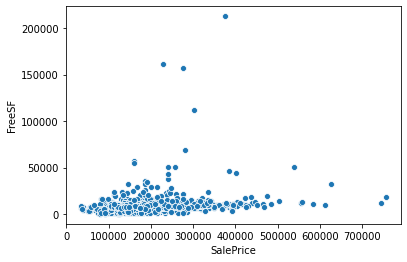

In [126]:
sns.scatterplot(houses_train['SalePrice'],houses_train['FreeSF'])

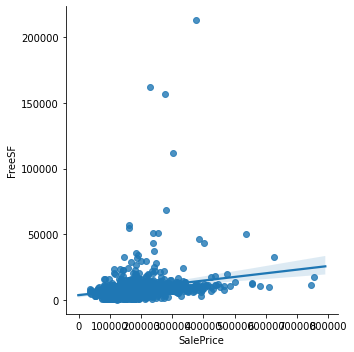

In [127]:
sns.lmplot(x ='SalePrice',y = 'FreeSF',data=houses_train)

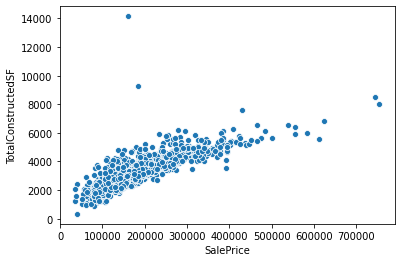

In [128]:
sns.scatterplot(houses_train['SalePrice'],houses_train['TotalConstructedSF'])

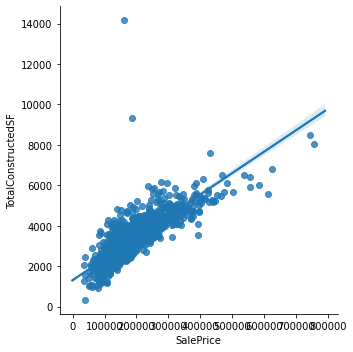

In [129]:
sns.lmplot(x ='SalePrice',y = 'TotalConstructedSF',data=houses_train)

Creating a TotalBath column 

I tested and this feature slightly improved the model score 

In [130]:
halfBsmt_baths = houses_train['BsmtHalfBath'] * 0.5
half_baths = houses_train['HalfBath'] * 0.5
houses_train['TotalBath'] = houses_train['FullBath'] + houses_train['BsmtFullBath'] + halfBsmt_baths +half_baths

In [131]:
halfBsmt_baths = houses_test['BsmtHalfBath'] * 0.5
half_baths = houses_test['HalfBath'] * 0.5
houses_test['TotalBath'] = houses_test['FullBath'] + houses_test['BsmtFullBath'] + halfBsmt_baths +half_baths

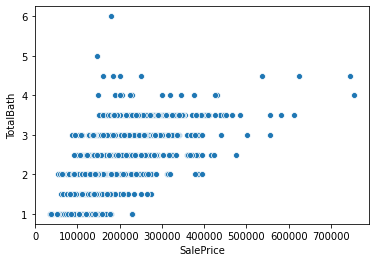

In [132]:
sns.scatterplot(houses_train['SalePrice'],houses_train['TotalBath'])

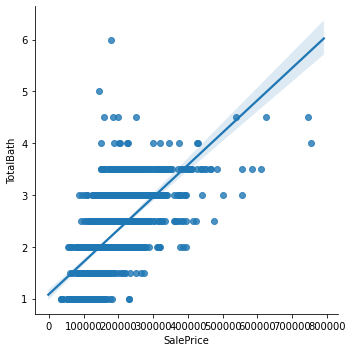

In [133]:
sns.lmplot(x ='SalePrice',y = 'TotalBath',data=houses_train)

Bathroom/Bedrooms ratio 
In this feature will only be used the number of Bedrooms and Baths that are not in the basement.

In [134]:
half_baths = houses_train['HalfBath'] * 0.5
houses_train['Bathroom/Bedroom ratio']  =  (houses_train['FullBath'] + half_baths) / houses_train['BedroomAbvGr']   

In [135]:
half_baths = houses_test['HalfBath'] * 0.5
houses_test['Bathroom/Bedroom ratio']  =  (houses_test['FullBath'] + half_baths) / houses_test['BedroomAbvGr'] 

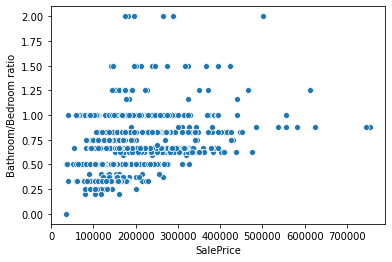

In [136]:
sns.scatterplot(houses_train['SalePrice'],houses_train['Bathroom/Bedroom ratio'])

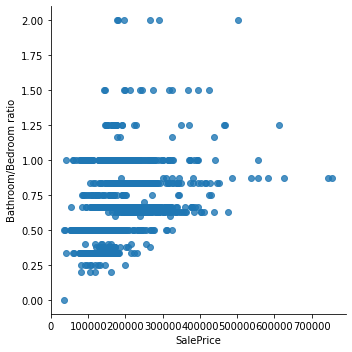

In [137]:
sns.lmplot(x ='SalePrice',y = 'Bathroom/Bedroom ratio',data=houses_train)

# Dummies

In [138]:
#creating a control variable for future split
houses_train['train'] = 1
houses_test['train'] = 0

In [139]:
#we have to concatenate because the datasets can have categorical features with different categories. 
houses_train = pd.concat([houses_train,houses_test],axis=0)

In [140]:
houses_train.shape

(2919, 82)

In [141]:
#getting the dummies of the train and test dataset
houses_train = pd.get_dummies(houses_train,drop_first=True)

In [142]:
houses_train.shape

(2919, 254)

In [143]:
#splitting the dataset using the control variable
houses_test = houses_train[houses_train['train'] == 0]
houses_train = houses_train[houses_train['train'] == 1]

In [144]:
houses_train.shape

(1460, 254)

In [145]:
houses_test.shape

(1459, 254)

In [146]:
#dropping unecessary features
houses_train.drop(['train'],axis=1,inplace=True)
houses_test.drop(['train'],axis=1,inplace=True)
houses_test.drop(['SalePrice'],axis=1,inplace=True)

In [147]:
#saving the cleaned data for future projects
houses_train.to_csv('houses_train_cleaned.csv',index=False)
houses_test.to_csv('houses_test_cleaned.csv',index=False)

# EDA

In [148]:
#import pandas_profiling as pp
#profile = pp.ProfileReport(houses_train, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})
#saving the profile
#profile.to_file(output_file="Relatorio01.html")

In [149]:
#profile.to_file(output_file="eda.html")

In [150]:
houses_train = pd.get_dummies(houses_train,drop_first=True)

In [151]:
houses_train_corr = houses_train.corr()

In [152]:
salePrice_corr = houses_train_corr['SalePrice']

In [153]:
relevant_salePrice_corr = []

#here well searching for relevation correlations , ill consider a correlation relevant if its >= 0.5 and <= -0.5
for (columnName, columnData) in houses_train_corr['SalePrice'].iteritems():
    if columnData >= 0.5 or columnData <= -0.5: #0.5 is the corr that i got the best results
        relevant_salePrice_corr.append((columnName,columnData))

In [154]:
relevant_salePrice_corr

[('OverallQual', 0.7909816005838047),
 ('YearBuilt', 0.5228973328794967),
 ('YearRemodAdd', 0.5071009671113867),
 ('TotalBsmtSF', 0.6135805515591944),
 ('1stFlrSF', 0.6058521846919166),
 ('GrLivArea', 0.7086244776126511),
 ('FullBath', 0.5606637627484452),
 ('TotRmsAbvGrd', 0.5337231555820238),
 ('GarageCars', 0.640409197258349),
 ('GarageArea', 0.6234314389183598),
 ('SalePrice', 1.0),
 ('TotalConstructedSF', 0.809741322904717),
 ('TotalBath', 0.6317310679319897),
 ('ExterQual_TA', -0.589043523409763),
 ('KitchenQual_TA', -0.5192978536548846)]

In [155]:
#We'll not use the GarageArea column because it may be too much correlated to GarageCars
houses_train_corr['GarageArea']['GarageCars']

0.8824754142814603

In [156]:
houses_train_corr['SalePrice']['FreeSF']
#not relevant at all

0.22433123579046213

In [157]:
houses_train_corr['SalePrice']['TotalBath']
#relevant

0.6317310679319897

In [158]:
houses_train_corr['SalePrice']['Bathroom/Bedroom ratio']

0.42453059684284666

In [159]:
relevant_columns_names_train = []
for i in relevant_salePrice_corr:
    relevant_columns_names_train.append(i[0])

In [160]:
#relevant_columns_names_train.remove('GarageCars')
relevant_columns_names_train.remove('TotalConstructedSF')

In [161]:
relevant_columns_names_train

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'TotalBath',
 'ExterQual_TA',
 'KitchenQual_TA']

In [162]:
for column in relevant_columns_names_train:
    for (columnName, columnData) in houses_train_corr[column].iteritems():
        if columnData >= 0.5 or columnData <= -0.5: #0.5 is the corr that i got the best results
            print(column , column_name ,columnData)

OverallQual SaleType 1.0
OverallQual SaleType 0.572322768962362
OverallQual SaleType 0.550683924194174
OverallQual SaleType 0.5378084986123927
OverallQual SaleType 0.5930074300286511
OverallQual SaleType 0.5505997093682552
OverallQual SaleType 0.6006707165907189
OverallQual SaleType 0.5620217566126064
OverallQual SaleType 0.7909816005838047
OverallQual SaleType 0.6929713722008507
OverallQual SaleType 0.5410628268191987
OverallQual SaleType 0.5477311929682153
OverallQual SaleType -0.646246668277156
OverallQual SaleType 0.5682106716460765
OverallQual SaleType -0.5538908114230887
YearBuilt SaleType 0.572322768962362
YearBuilt SaleType 1.0
YearBuilt SaleType 0.5928549763436497
YearBuilt SaleType 0.5378500917111045
YearBuilt SaleType 0.5228973328794967
YearBuilt SaleType 0.5242982563713869
YearBuilt SaleType 0.5182307380612182
YearBuilt SaleType 0.5187342065943388
YearBuilt SaleType 0.5146085612952889
YearBuilt SaleType 0.5579098795405896
YearBuilt SaleType -0.5891256992710595
YearBuilt Sal

In [163]:
houses_train  = houses_train[relevant_columns_names_train]

In [164]:
#now we have our dataset ready to be splitted and used on the models
houses_train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,TotalBath,ExterQual_TA,KitchenQual_TA
0,7,2003,2003,856.0,856,1710,2,8,2.0,548.0,208500.0,3.5,0,0
1,6,1976,1976,1262.0,1262,1262,2,6,2.0,460.0,181500.0,2.5,1,1
2,7,2001,2002,920.0,920,1786,2,6,2.0,608.0,223500.0,3.5,0,0
3,7,1915,1970,756.0,961,1717,1,7,3.0,642.0,140000.0,2.0,1,0
4,8,2000,2000,1145.0,1145,2198,2,9,3.0,836.0,250000.0,3.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953.0,953,1647,2,7,2.0,460.0,175000.0,2.5,1,1
1456,6,1978,1988,1542.0,2073,2073,2,7,2.0,500.0,210000.0,3.0,1,1
1457,7,1941,2006,1152.0,1188,2340,2,9,1.0,252.0,266500.0,2.0,0,0
1458,5,1950,1996,1078.0,1078,1078,1,5,1.0,240.0,142125.0,2.0,1,0


In [165]:
#sns.pairplot(houses_train)

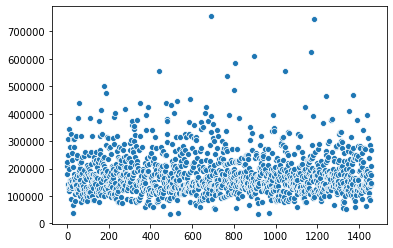

In [166]:
#searching for outliers
sns.scatterplot(data =houses_train['SalePrice'])

In [167]:
houses_train = houses_train[houses_train.SalePrice<600000]

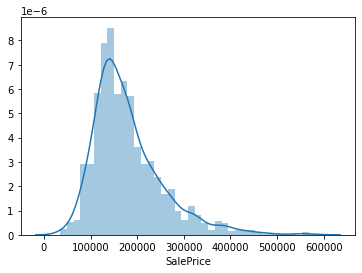

In [168]:
sns.distplot( houses_train['SalePrice'])

# Test dataset for Kaggle competition

In [169]:
relevant_columns_names_test = relevant_columns_names_train.remove('SalePrice')
houses_test = pd.get_dummies(houses_test,drop_first=True)
houses_test = houses_test[relevant_columns_names_train]

## Splitting the training and test sets

In [170]:
y = houses_train['SalePrice']

In [171]:
X = houses_train.drop(['SalePrice'],axis = 1)

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Useful functions

In [174]:
from sklearn import metrics

In [175]:
def plot_train_test_predictions(model_name,model_predictions_train,model_predictions_test):
    
    plt.scatter(model_predictions_train, y_train, c = "blue",  label = "Training data")
    plt.scatter(model_predictions_test, y_test, c = "black",  label = "Test data")
    plt.title(model_name)
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
    plt.show()

In [176]:
def plot_y_predictions(model_name,model_predictions_train,model_predictions_test):
    
    test_fig = plt.figure()
    plt.plot(y_test,c= 'green',label = 'Y test',marker = 'o',linestyle = 'None')
    plt.plot(model_predictions_test,c= 'red',label = 'Test predictions',marker = 'o',linestyle = 'None')
    plt.title(model_name + '(test)')
    plt.ylabel('SalePrice')
    plt.legend(loc = "upper right")
    plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
    test_fig.show()
    
    train_fig = plt.figure()
    plt.plot(y_train,c= 'green',label = 'Y train',marker = 'o',linestyle = 'None')
    plt.plot(model_predictions_train,c= 'red',label = 'Train predictions',marker = 'o',linestyle = 'None')
    plt.title(model_name+'(Train)')
    plt.ylabel('SalePrice')
    plt.legend(loc = "upper right")
    plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
    train_fig.show()

In [177]:
def scores(model,model_predictions_test):
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model_predictions_test)))
    print('R2 score:', model.score(X_test,y_test))

In [234]:
def kaggle_submission_csv(model_name,model):
    predictions = model.predict(houses_test)
    predictions = pd.Series(predictions)
    entry = pd.concat([test_ids,predictions],axis=1)
    entry.columns = ['Id','SalePrice']
    entry.to_csv(model_name+'_entry.csv',index=False)

# Training models

In [179]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

## Linear Regression model

In [180]:
from sklearn.linear_model import LinearRegression

In [181]:
lm = LinearRegression(normalize=True)

In [182]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [183]:
lm_predictions_train = lm.predict(X_train)
lm_predictions_test = lm.predict(X_test)

In [184]:
scores(lm,lm_predictions_test)

RMSE: 41580.75697079967
R2 score: 0.7268255667317023


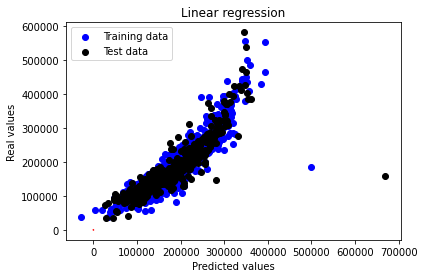

In [185]:
plot_train_test_predictions('Linear regression',lm_predictions_train,lm_predictions_test)

/home/raphael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
/home/raphael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


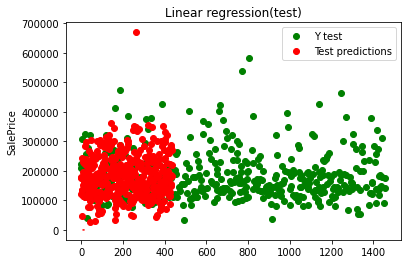

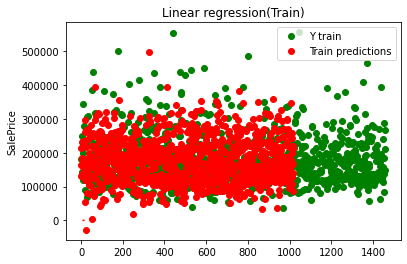

In [186]:
plot_y_predictions('Linear regression',lm_predictions_train,lm_predictions_test)

In [187]:
kaggle_submission_csv('linear_regression',lm)

## Ridge Regression model

In [188]:
from sklearn.linear_model import Ridge

In [189]:
rr = Ridge(alpha=1.0)

In [190]:
rr.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [191]:
rr_predictions_train = rr.predict(X_train)
rr_predictions_test = rr.predict(X_test)

In [192]:
scores(rr,rr_predictions_test)

RMSE: 41585.390348293055
R2 score: 0.726764683242165


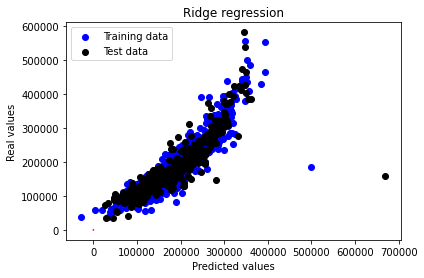

In [193]:
plot_train_test_predictions('Ridge regression',rr_predictions_train,rr_predictions_test)

/home/raphael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
/home/raphael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


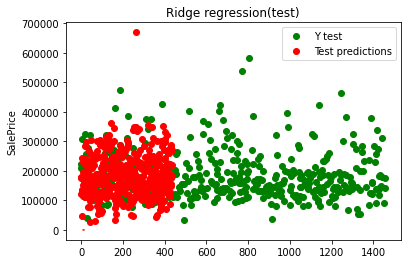

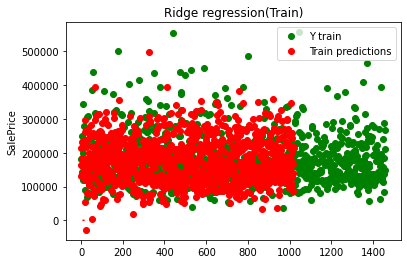

In [194]:
plot_y_predictions('Ridge regression',rr_predictions_train,rr_predictions_test)

In [195]:
kaggle_submission_csv('ridge_regression',rr)

## Random Forest Regressor model

In [196]:
from sklearn.ensemble import RandomForestRegressor

In [197]:
rfr = RandomForestRegressor()

In [198]:
rfr.fit(X_train,y_train)

/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [199]:
rfr_predictions_train = rfr.predict(X_train)
rfr_predictions_test= rfr.predict(X_test)

In [200]:
scores(rfr,rfr_predictions_test)

RMSE: 32373.584885756456
R2 score: 0.8344089517666927


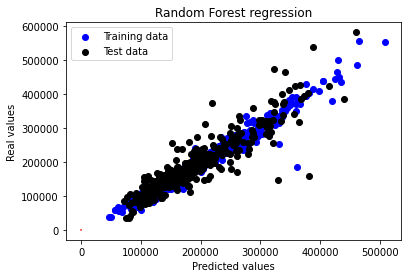

In [201]:
plot_train_test_predictions('Random Forest regression',rfr_predictions_train,rfr_predictions_test)

/home/raphael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
/home/raphael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


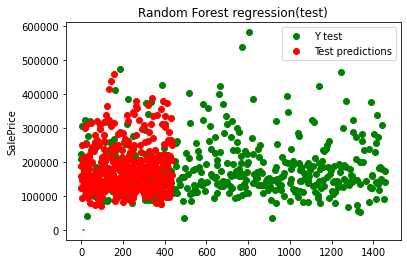

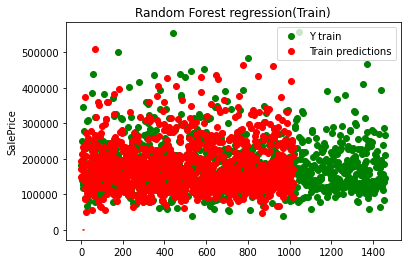

In [202]:
plot_y_predictions('Random Forest regression',rfr_predictions_train,rfr_predictions_test)

In [203]:
kaggle_submission_csv('random_forest_regression',rfr)

This model worked much better than a simple linear regression.

### Grid Search

In [204]:
rfr_param_grid = {
    'n_estimators': [100,500,900],
    'max_depth':[3,5,10,15],
    'criterion': ['mse'],
    'bootstrap':['True','False'],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[2,3,4]
    }

In [205]:
grid_search = GridSearchCV(rfr,rfr_param_grid,scoring= make_scorer(mean_squared_error,greater_is_better=False),verbose=1,n_jobs = 2,cv = 5)

In [206]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   16.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.9min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  6.8min
[Parallel(n_jobs=2)]: Done 1080 out of 1080 | elapsed: 10.0min finished
/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'n_estimators': [100, 500, 900], 'max_depth': [3, 5, 10, 15], 'criterion': ['mse'], 'bootstrap': ['True', 'False'], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=1)

In [207]:
grid_search.best_params_

{'bootstrap': 'True',
 'criterion': 'mse',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 100}

In [235]:
rfr_gs = RandomForestRegressor(
    bootstrap = 'True',
    criterion = 'mse',
    max_depth= 15,
    min_samples_leaf = 4,
    min_samples_split= 3,
    n_estimators = 100
)

In [236]:
rfr_gs.fit(X_train,y_train)

RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [237]:
rfr_predictions_train_gs = rfr_gs.predict(X_train)
rfr_predictions_test_gs = rfr_gs.predict(X_test)

In [238]:
scores(rfr_gs,rfr_predictions_test_gs)

RMSE: 31877.090025918522
R2 score: 0.8394491511718798


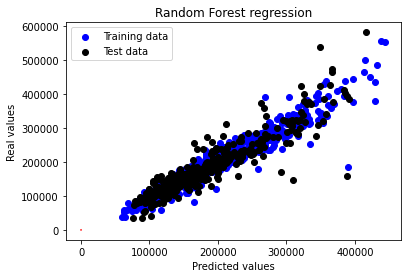

In [212]:
plot_train_test_predictions('Random Forest regression',rfr_predictions_train_gs,rfr_predictions_test_gs)

/home/raphael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
/home/raphael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


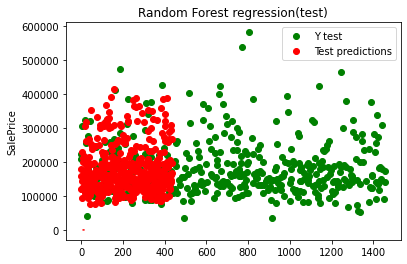

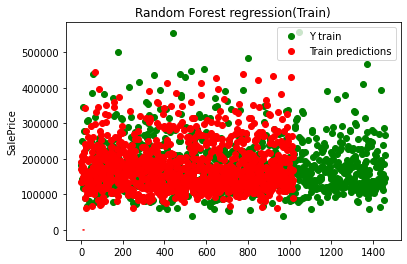

In [213]:
plot_y_predictions('Random Forest regression',rfr_predictions_train_gs,rfr_predictions_test_gs)

In [214]:
kaggle_submission_csv('random_forest_regression_gs',rfr_gs)

## XGBoost Regressor

In [215]:
import xgboost as xgb

/home/raphael/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/raphael/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/raphael/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [216]:
xgbr = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [217]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [218]:
xgb_predictions_train = xgbr.predict(X_train)
xgb_predictions_test = xgbr.predict(X_test)

In [219]:
scores(xgbr,xgb_predictions_test)

RMSE: 29256.973060985118
R2 score: 0.8647572317209087


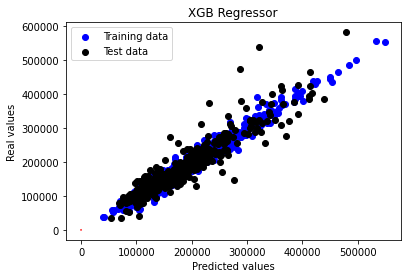

In [220]:
plot_train_test_predictions('XGB Regressor',xgb_predictions_train,xgb_predictions_test)

/home/raphael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
/home/raphael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


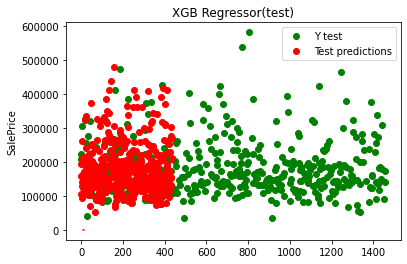

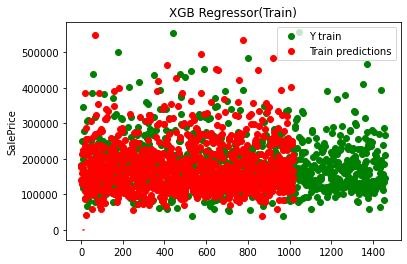

In [221]:
plot_y_predictions('XGB Regressor',xgb_predictions_train,xgb_predictions_test)

In [222]:
kaggle_submission_csv('XGB_regression',xgbr)

### Grid search

In [223]:
# Grid search 
xgbr_param_grid = {
    'n_estimators':[10,50,100],
    'colsample_bytree': [0.3,0.7,1],
    'n_estimators': [50],
    'max_depth': [1,3,6],
    'gamma':[0,1,2],
    'reg_lambda':[1,2,3],
    'reg_alpha':[0,1]
}


In [224]:
grid_search = GridSearchCV(xgbr,xgbr_param_grid,scoring= make_scorer(mean_squared_error,greater_is_better=False),verbose=1,n_jobs = 2,cv = 5)

In [225]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 380 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done 810 out of 810 | elapsed:   14.5s finished
/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=3,
       min_child_weight=1, miss... scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'n_estimators': [50], 'colsample_bytree': [0.3, 0.7, 1], 'max_depth': [1, 3, 6], 'gamma': [0, 1, 2], 'reg_lambda': [1, 2, 3], 'reg_alpha': [0, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=1)

In [226]:
grid_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0,
 'max_depth': 3,
 'n_estimators': 50,
 'reg_alpha': 1,
 'reg_lambda': 2}

In [227]:
xgbr_gs = xgb.XGBRegressor(
    colsample_bytree = 0.3,
    gamma = 0,
    max_depth = 3,
    n_estimators = 50,
    reg_alpha = 1,
    reg_lambda = 1
)

In [228]:
xgbr_gs.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=50, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=1,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [229]:
xgb_predictions_train_gs = xgbr_gs.predict(X_train)
xgb_predictions_test_gs = xgbr_gs.predict(X_test)

In [230]:
scores(xgbr_gs,xgb_predictions_test_gs)

RMSE: 29935.630764534795
R2 score: 0.858410158683354


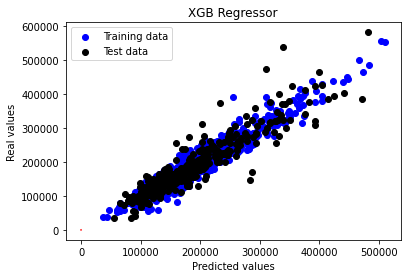

In [231]:
plot_train_test_predictions('XGB Regressor',xgb_predictions_train_gs,xgb_predictions_test_gs)

/home/raphael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
/home/raphael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


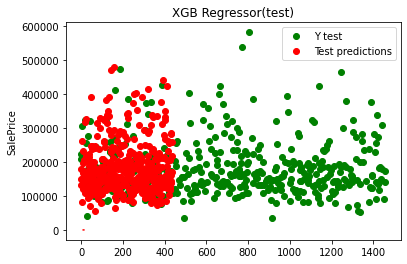

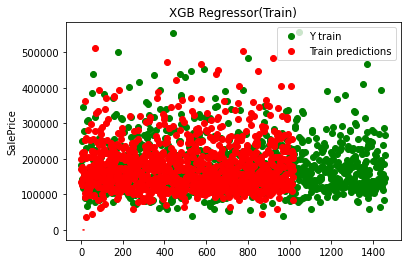

In [232]:
plot_y_predictions('XGB Regressor',xgb_predictions_train_gs,xgb_predictions_test_gs)

The grid search slightly improved the score.

In [233]:
kaggle_submission_csv('xgb_regression_gs',xgbr_gs)